# **Approximate and Subdivide Poligons**

Images to use: 

  - [shapes.jpg ](https://drive.google.com/file/d/1KaEkVCVxEADXiLDkLlDJw4lLl-4v2aGF/view?usp=sharing) 


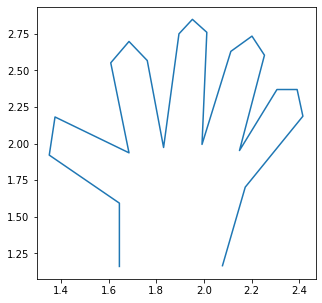

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon


hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

plt.figure(figsize=(5, 5))
plt.plot(hand[:, 0], hand[:, 1])

N points hand: 22 
N points subd_hand: 704


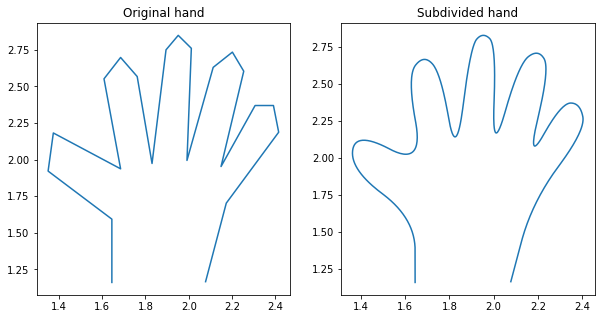

In [21]:
# subdivide polygon using 2nd degree B-Splines
subd_hand = hand.copy()

for i in range(5): 
  subd_hand = subdivide_polygon( subd_hand , degree=2, preserve_ends=True)

_, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot (hand[:, 0], hand[:, 1]); axes[0].set_title("Original hand")
axes[1].plot (subd_hand[:, 0], subd_hand[:, 1]); axes[1].set_title("Subdivided hand")
print("N points hand: {0} \nN points subd_hand: {1}".format(len(hand), len(subd_hand)))

In [36]:
# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon( subd_hand , tolerance=0.002)

print("Number of coordinates:", len(hand), len( subd_hand ), len( appr_hand ))

Number of coordinates: 22 704 100


([<matplotlib.lines.Line2D at 0x7f9f07252450>],
 Text(0.5, 1.0, 'Douglas-Peucker'))

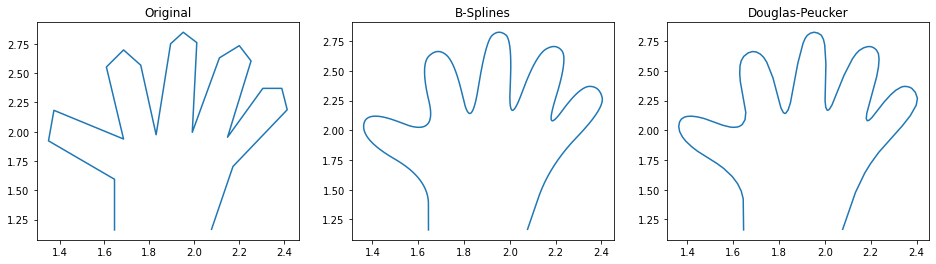

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.plot( hand [:, 0], hand [:, 1]), ax1.set_title("Original"), #ax1.set_xticks([]), ax1.set_yticks([])
ax2.plot( subd_hand [:, 0], subd_hand [:, 1]), ax2.set_title("B-Splines"), #ax2.set_xticks([]), ax2.set_yticks([])
ax3.plot( appr_hand [:, 0], appr_hand [:, 1]), ax3.set_title("Douglas-Peucker"), #ax3.set_xticks([]), ax3.set_yticks([])

# **... On the shape of a real form**

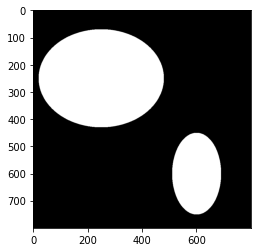

In [38]:
# Draw two ellipses in an image
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

plt.imshow(img, cmap="gray")

Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


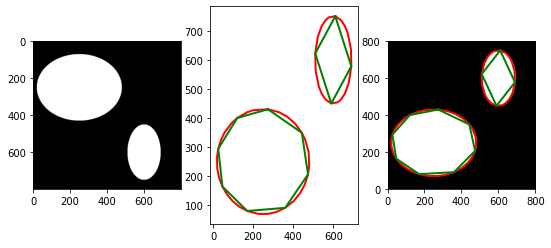

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 4))
ax1.imshow(img, cmap="gray"), ax3.imshow(img, cmap="gray")

# approximate / simplify coordinates of the two ellipses
for contour in find_contours( img , 0 ):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    ax3.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=40)
    ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    ax3.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax3.axis((0, 800, 0, 800))

plt.show()

# **... Shape detection in an image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import cv2
import numpy as np
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
import matplotlib.pyplot as plt

1005
1310
1082
946
922
1309


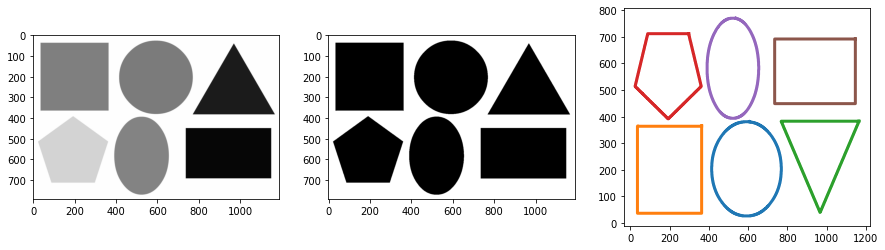

In [49]:
# Take an image - shapes.jpg (grayscale)
img = cv2.imread("/content/shapes.png", 0)

# Apply a threshold (binary)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)

# Find the contours
contours = find_contours(threshold, 0) 

# plot everything
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(threshold, cmap='gray')

for contour in contours:
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=3)
    print(len(contour))


Number of coordinates: 1005 17
Number of coordinates: 1310 5
Number of coordinates: 1082 4
Number of coordinates: 946 7
Number of coordinates: 922 17
Number of coordinates: 1309 5


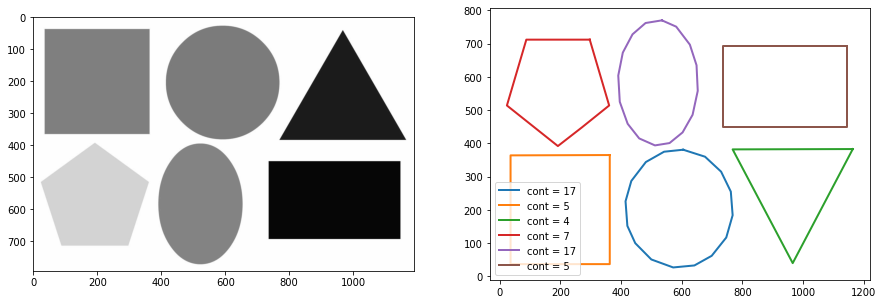

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.imshow(img, cmap='gray')

# Approximate all contours in the image 
for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance = 7) #--> Approximate
    ax2.plot(coords[:, 1], coords[:, 0], linewidth=2, label= "cont = " + str(len(coords)))
    print("Number of coordinates:", len(contour), len(coords))

ax2.legend()

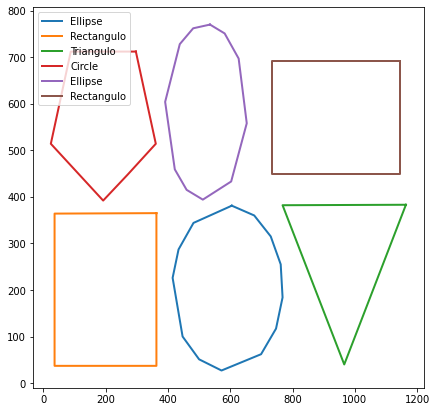

In [57]:
fig, ax2 = plt.subplots(figsize=(7, 7))

# Approximate all contours and then, count the num of points
for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=13)

    if len(coords)-1 == 3:
      label = "Triangulo"
    elif len(coords)-1 == 4:
      label = "Rectangulo"
    elif len(coords)-1 == 5:
      label = "Pentagono"
    elif 6 < len(coords)-1 < 15:
      label = "Ellipse"
    else:
      label = "Circle"
    
    ax2.plot(coords[:, 1], coords[:, 0], linewidth=2, label= label)
    #print("Number of coordinates:", len(contour), len(coords))

ax2.legend()